In [91]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [92]:
df = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Abalone-Age-Prediction/master/abalone.csv')

In [93]:
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [94]:
df.tail(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


In [95]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [96]:
df = pd.DataFrame(data=df)

In [97]:
df.shape

(4177, 9)

In [98]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [99]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

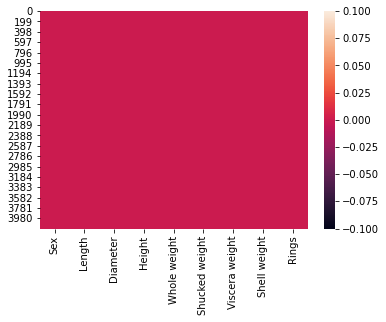

In [100]:
sns.heatmap(df.isnull())

In [101]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

/home/amritesh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Diameter', ylabel='Density'>

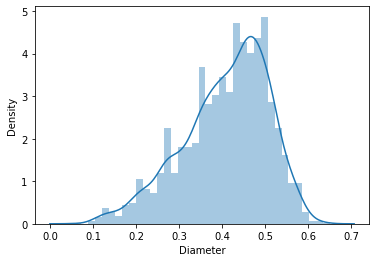

In [102]:
sns.distplot(df['Diameter'])

/home/amritesh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

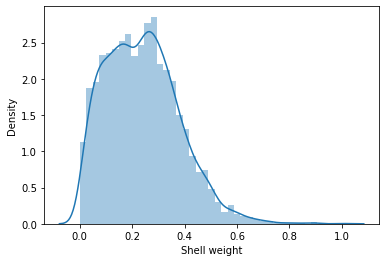

In [103]:
sns.distplot(df['Shell weight'])

In [104]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [105]:
df.iloc[:0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [106]:
lencode = LabelEncoder()

In [107]:
df['Gender'] = lencode.fit_transform(df['Sex'])

In [108]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Gender
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0


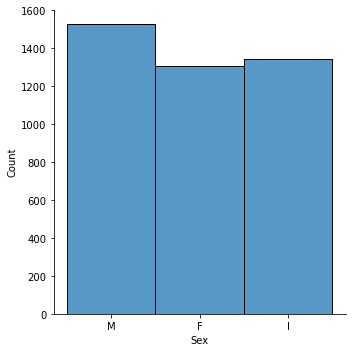

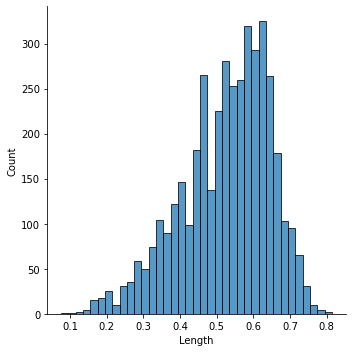

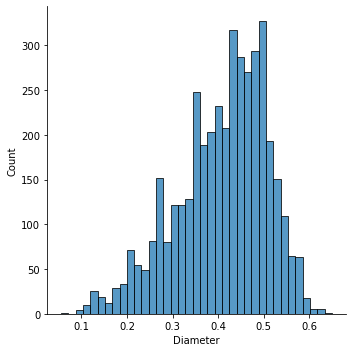

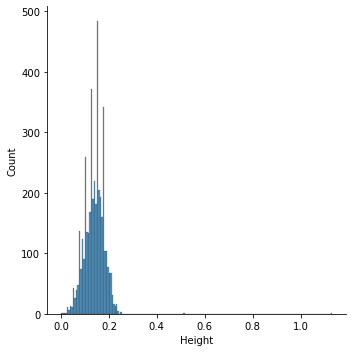

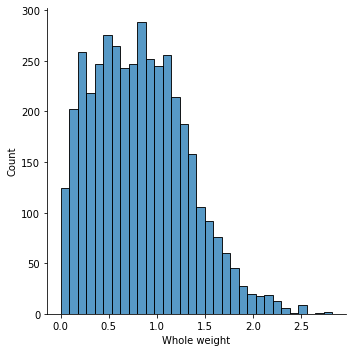

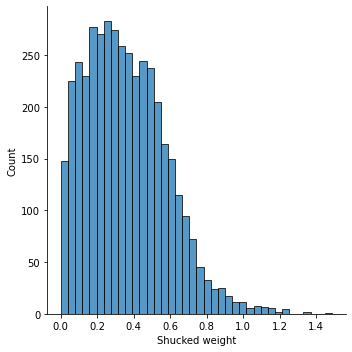

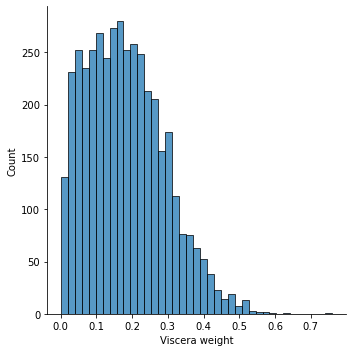

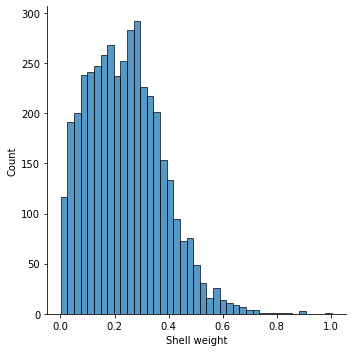

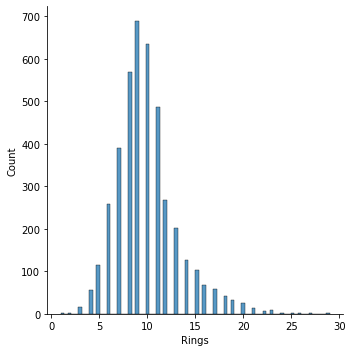

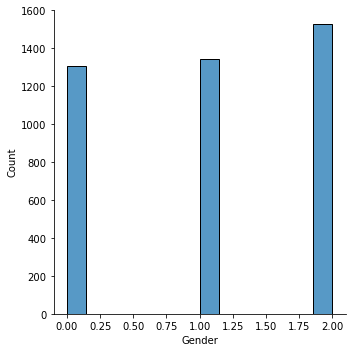

In [109]:
for i in df.columns:
    sns.displot(df[i])

/home/amritesh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

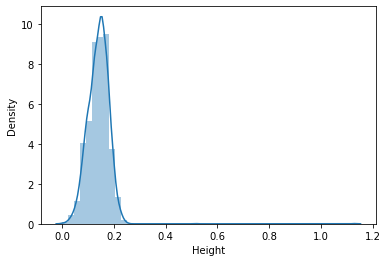

In [110]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Height', ylabel='Count'>

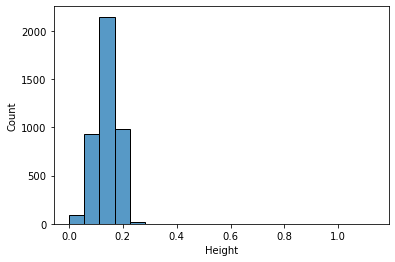

In [111]:
sns.histplot(df['Height'],bins=20)

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

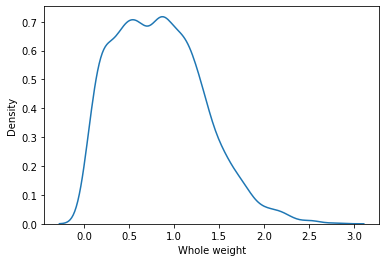

In [112]:
sns.kdeplot(df['Whole weight'])

<AxesSubplot:xlabel='Shell weight', ylabel='Height'>

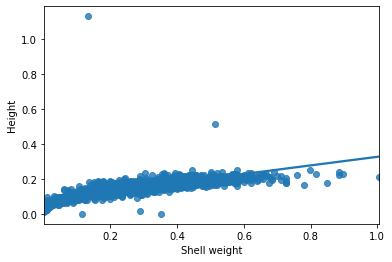

In [113]:
sns.regplot(x="Shell weight",y="Height",data=df)

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

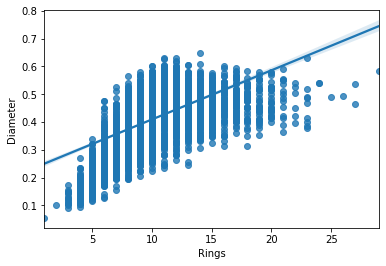

In [114]:
sns.regplot(x="Rings",y="Diameter",data=df)

<AxesSubplot:xlabel='Whole weight', ylabel='Diameter'>

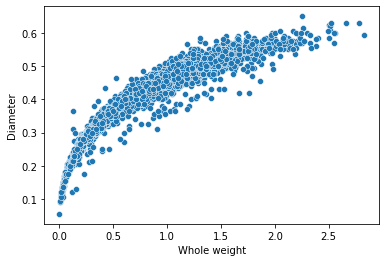

In [115]:
sns.scatterplot(x="Whole weight",y="Diameter",data=df)

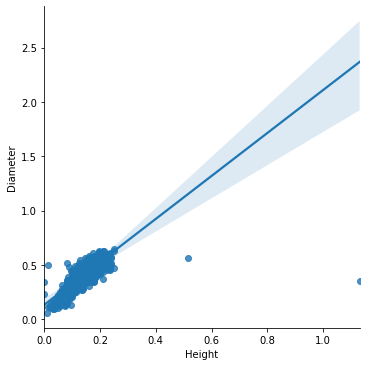

In [116]:
sns.lmplot(x='Height',y='Diameter',data=df)

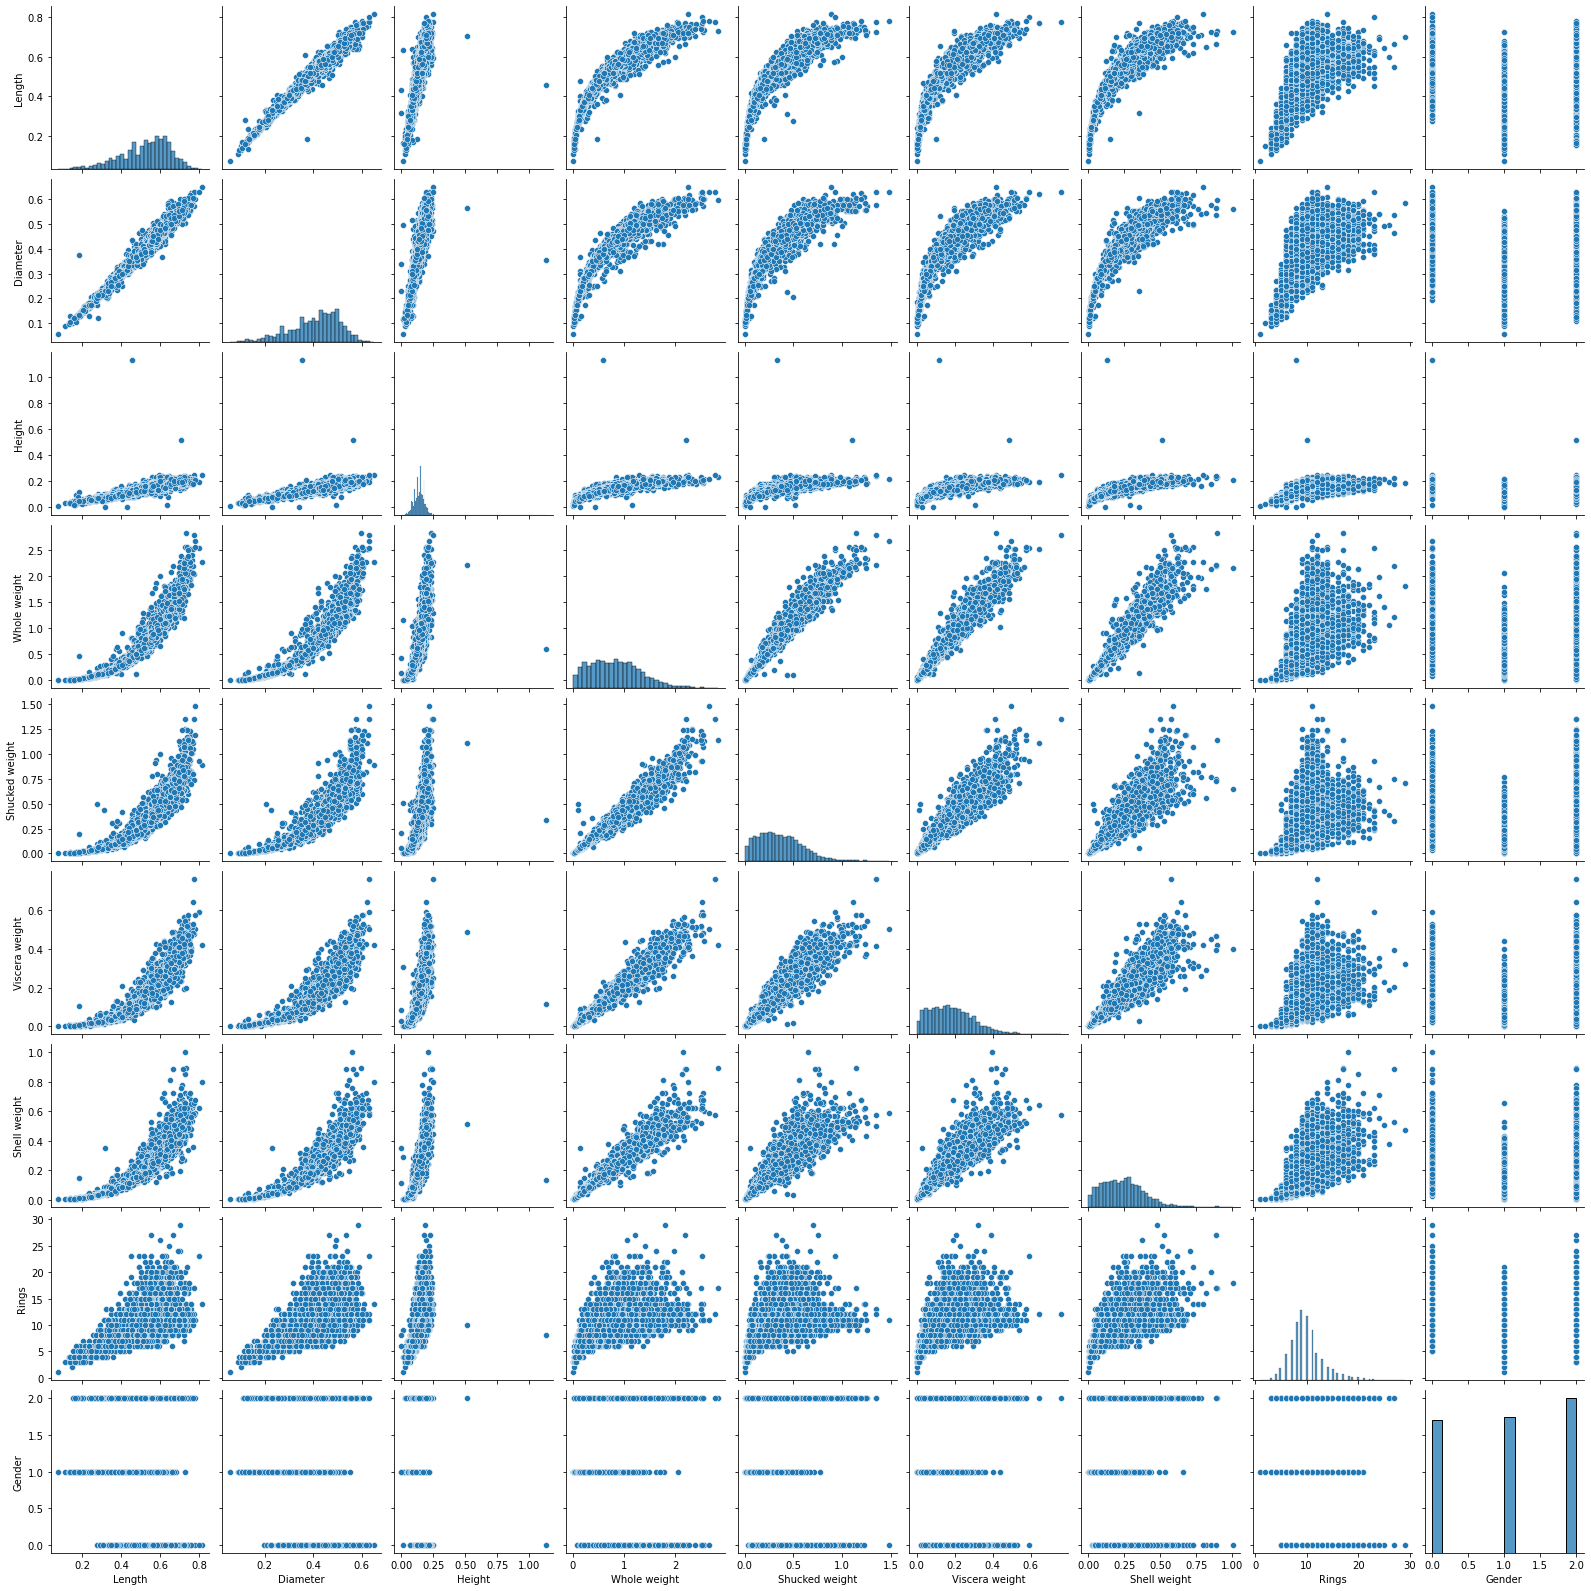

In [117]:
sns.pairplot(df)

In [118]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Gender
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,1.052909
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.822240
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,1.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,2.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,2.000000


In [119]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Gender           -0.098155
dtype: float64

In [120]:
import numpy as np
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Gender'],
      dtype='object')

In [121]:
df['Height'] =  np.sqrt(df['Height'])

In [122]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height           -0.295641
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Gender           -0.098155
dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Count'>

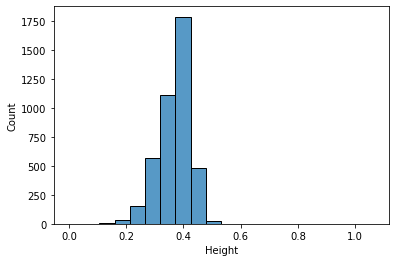

In [123]:
sns.histplot(df['Height'],bins=20)

In [124]:
from scipy.stats import zscore

In [125]:
df = df.drop(['Sex'],axis=1)

In [126]:
dfzscroe = np.abs(zscore(df))

In [127]:
print(np.where(dfzscroe>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        237,  238,  238,  238,  239,  239,  270,  275,  277,  278,  294,
        306,  310,  313,  314,  334,  351,  355,  358,  358,  362,  375,
        416,  417,  428,  431,  433,  469,  478,  480,  501,  526,  526,
        530,  572,  628,  673,  674,  675,  678,  694,  694,  696,  696,
        718,  719,  719,  719,  720,  720,  720,  744,  754,  756,  811,
        891,  891,  891, 1048, 1051, 1051, 1052, 1174, 1193, 1197, 1199,
       1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209, 1209, 1257,
       1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428, 1429, 1429,
       1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762, 1763,
       1763, 1763, 1821, 1982, 1986, 1987, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2114, 2157, 2161, 2169, 2171, 2172, 2176, 2180,
       2199, 2201, 2208, 2209, 2274, 2275, 2305, 2

In [128]:
dfnew = df[(dfzscroe<3).all(axis=1)]

In [129]:
df = dfnew

In [130]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Gender
Length,1.000000,0.985807,0.907285,0.935022,0.909742,0.908448,0.914874,0.563535,-0.043978
Diameter,0.985807,1.000000,0.912648,0.934606,0.904681,0.904582,0.922138,0.581657,-0.046893
Height,0.907285,0.912648,1.000000,0.882321,0.835174,0.860207,0.889508,0.616311,-0.047602
Whole weight,0.935022,0.934606,0.882321,1.000000,0.970881,0.966476,0.961026,0.545911,-0.034812
Shucked weight,0.909742,0.904681,0.835174,0.970881,1.000000,0.929837,0.895712,0.437522,-0.016429
Viscera weight,0.908448,0.904582,0.860207,0.966476,0.929837,1.000000,0.919089,0.520584,-0.045187
Shell weight,0.914874,0.922138,0.889508,0.961026,0.895712,0.919089,1.000000,0.620817,-0.043998
Rings,0.563535,0.581657,0.616311,0.545911,0.437522,0.520584,0.620817,1.000000,-0.033682
Gender,-0.043978,-0.046893,-0.047602,-0.034812,-0.016429,-0.045187,-0.043998,-0.033682,1.000000


<AxesSubplot:>

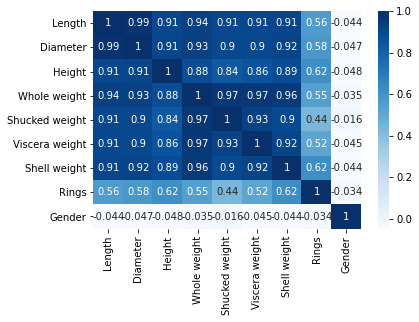

In [131]:
sns.heatmap(df.corr(),cmap="Blues",annot=True)

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [133]:
x = df.iloc[:,0:-1]

In [134]:
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.406202,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.367423,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.452769,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.387298,1.0945,0.5310,0.2610,0.2960,10


In [135]:
x.shape

(4019, 8)

In [136]:
x.shape[1]

8

In [137]:
y = df.iloc[:,-1]

In [138]:
def vif_calc():
    vif = pd.DataFrame()
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [139]:
vif_calc()

In [140]:
df.drop(['Length','Shucked weight'],axis=1,inplace=True)

In [141]:
df

,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings,Gender
0,0.365,0.308221,0.5140,0.1010,0.1500,15,2
1,0.265,0.300000,0.2255,0.0485,0.0700,7,2
2,0.420,0.367423,0.6770,0.1415,0.2100,9,0
3,0.365,0.353553,0.5160,0.1140,0.1550,10,2
4,0.255,0.282843,0.2050,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...
4172,0.450,0.406202,0.8870,0.2390,0.2490,11,0
4173,0.440,0.367423,0.9660,0.2145,0.2605,10,2
4174,0.475,0.452769,1.1760,0.2875,0.3080,9,2
4175,0.485,0.387298,1.0945,0.2610,0.2960,10,0


In [142]:
x=df.iloc[:,:-1]
x

,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,0.365,0.308221,0.5140,0.1010,0.1500,15
1,0.265,0.300000,0.2255,0.0485,0.0700,7
2,0.420,0.367423,0.6770,0.1415,0.2100,9
3,0.365,0.353553,0.5160,0.1140,0.1550,10
4,0.255,0.282843,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...
4172,0.450,0.406202,0.8870,0.2390,0.2490,11
4173,0.440,0.367423,0.9660,0.2145,0.2605,10
4174,0.475,0.452769,1.1760,0.2875,0.3080,9
4175,0.485,0.387298,1.0945,0.2610,0.2960,10


In [143]:
x.shape

(4019, 6)

In [144]:
vif_calc()

<AxesSubplot:>

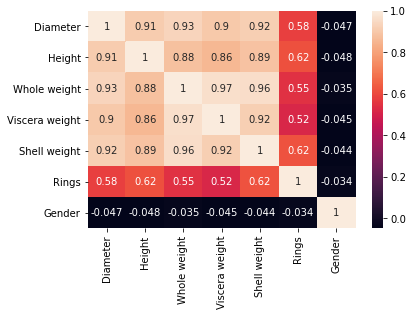

In [145]:
sns.heatmap(df.corr(), annot=True)

In [146]:
x=df.iloc[:,0:-1]

In [147]:
x.shape

(4019, 6)

In [148]:
y.shape

(4019,)

In [151]:
scale= StandardScaler()
x= scale.fit_transform(x)

In [152]:
x.shape

(4019, 6)

In [153]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=55)